<a href="https://colab.research.google.com/github/Suryaanugrah2001/EDA-Netflix/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
from google.colab import files
df = pd.read_csv("/content/gdrive/MyDrive/netflix.csv")
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [8]:
print(df.describe())


             index  release_year      runtime   imdb_score    imdb_votes
count  5283.000000   5283.000000  5283.000000  5283.000000  5.267000e+03
mean   2641.000000   2015.879992    79.199886     6.533447  2.340719e+04
std    1525.215067      7.346098    38.915974     1.160932  8.713432e+04
min       0.000000   1953.000000     0.000000     1.500000  5.000000e+00
25%    1320.500000   2015.000000    45.000000     5.800000  5.210000e+02
50%    2641.000000   2018.000000    87.000000     6.600000  2.279000e+03
75%    3961.500000   2020.000000   106.000000     7.400000  1.014400e+04
max    5282.000000   2022.000000   235.000000     9.600000  2.268288e+06


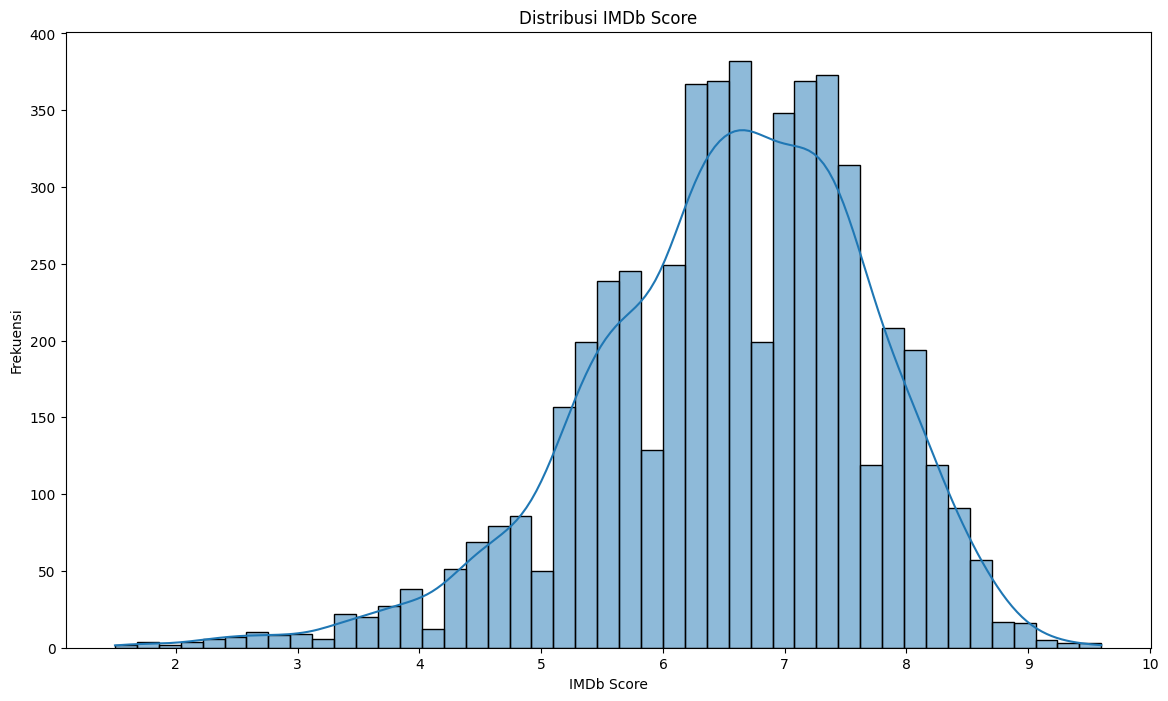

In [12]:
# visualisasi distribusi skor IMDb
plt.figure(figsize=(14, 8))
sns.histplot(df['imdb_score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Frekuensi')
plt.title('Distribusi IMDb Score')
plt.show()

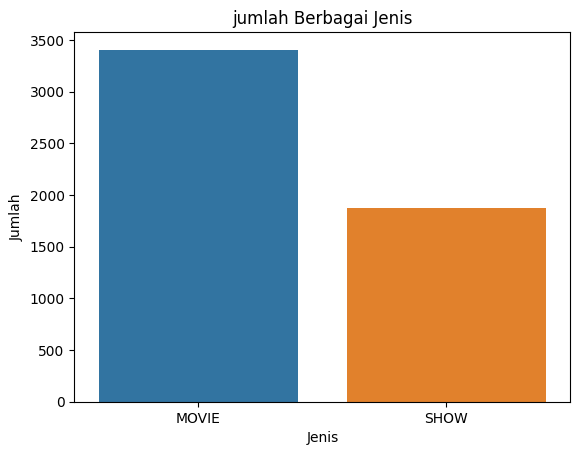

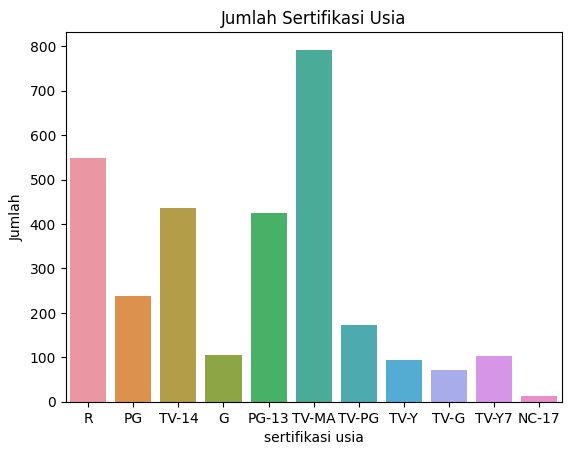

In [13]:
#Jumlah jenis yang berbeda (MOVIE, SHOW, dll.)
sns.countplot(x='type', data=df)
plt.xlabel('Jenis')
plt.ylabel('Jumlah')
plt.title('jumlah Berbagai Jenis')
plt.show()

# Jumlah sertifikasi usia
sns.countplot(x='age_certification', data=df)
plt.xlabel('sertifikasi usia')
plt.ylabel('Jumlah')
plt.title('Jumlah Sertifikasi Usia')
plt.show()

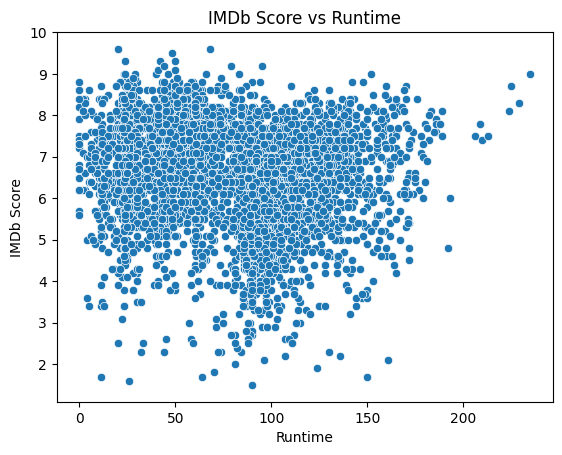

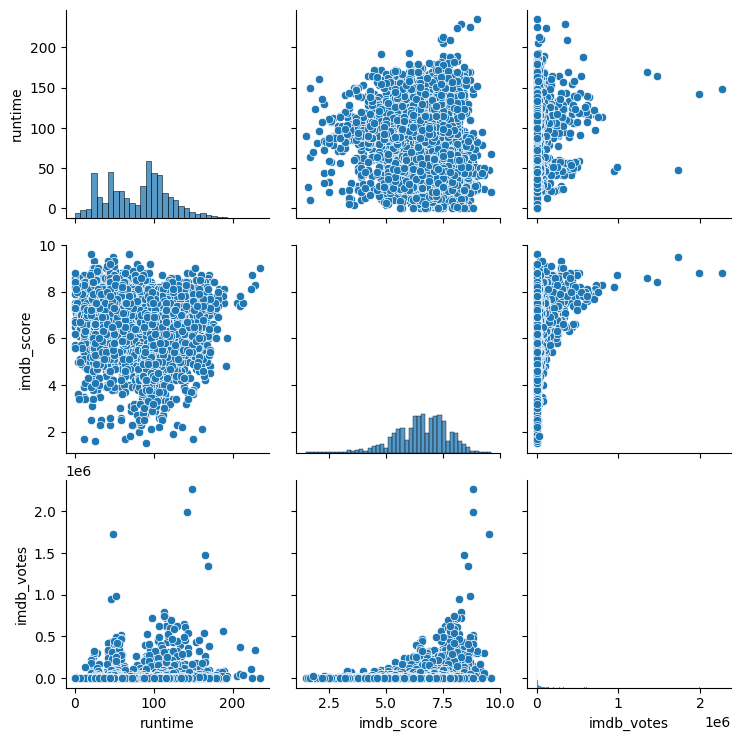

In [14]:
# Hubungan antara skor IMDb dan Sertifikasi Usia
sns.scatterplot(x='runtime', y='imdb_score', data=df)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('IMDb Score vs Runtime')
plt.show()

sns.pairplot(df[['runtime', 'imdb_score', 'imdb_votes']])
plt.show()

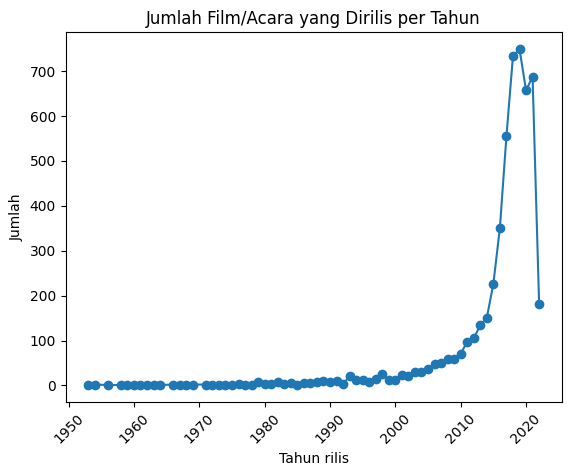

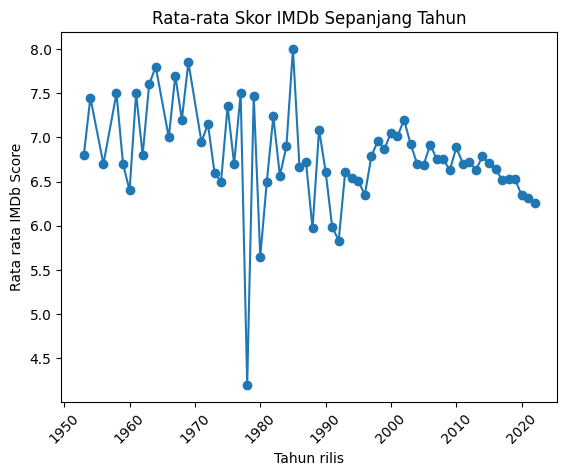

In [15]:
# Jumlah film/acara yang dirilis per tahun
yearly_counts = df['release_year'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Tahun rilis')
plt.ylabel('Jumlah')
plt.title('Jumlah Film/Acara yang Dirilis per Tahun')
plt.xticks(rotation=45)
plt.show()

# Rata-rata skor IMDb selama bertahun-tahun
yearly_mean_score = df.groupby('release_year')['imdb_score'].mean()
plt.plot(yearly_mean_score.index, yearly_mean_score.values, marker='o')
plt.xlabel('Tahun rilis')
plt.ylabel('Rata rata IMDb Score')
plt.title('Rata-rata Skor IMDb Sepanjang Tahun')
plt.xticks(rotation=45)
plt.show()

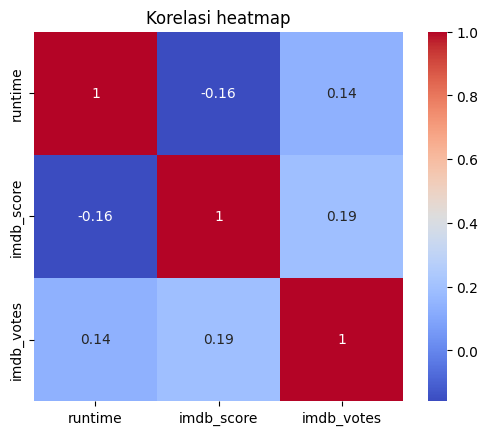

In [17]:
# Korelasi
correlation = df[['runtime', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Korelasi heatmap')
plt.show()

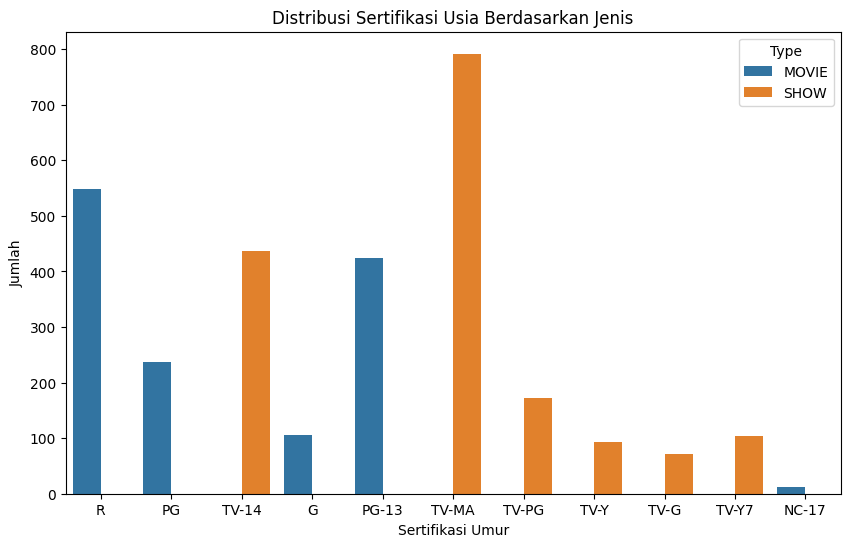

In [18]:
# Distribusi sertifikasi usia berdasarkan jeniS
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue='type', data=df)
plt.xlabel('Sertifikasi Umur')
plt.ylabel('Jumlah')
plt.title('Distribusi Sertifikasi Usia Berdasarkan Jenis')
plt.legend(title='Type')
plt.show()

Dari gambar, kita dapat melihat bahwa film lebih cenderung menerima sertifikasi usia PG-13 dan R daripada acara. Ini kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Film cenderung memiliki konten yang lebih dewasa daripada acara.
2. Film cenderung memiliki jangkauan yang lebih luas daripada acara.
3. PG-13 adalah sertifikasi usia yang berarti bahwa film tersebut tidak disarankan untuk ditonton oleh anak-anak di bawah usia 13 tahun.
R adalah sertifikasi usia yang berarti bahwa film tersebut hanya boleh ditonton oleh orang dewasa.

Acara lebih cenderung menerima sertifikasi usia TV-PG dan TV-14 daripada film. Ini kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Acara cenderung memiliki konten yang lebih ringan daripada film.
2. Acara cenderung memiliki target penonton yang lebih spesifik daripada film.

TV-PG adalah sertifikasi usia yang berarti bahwa acara tersebut tidak disarankan untuk ditonton oleh anak-anak di bawah usia 14 tahun. TV-14 adalah sertifikasi usia yang berarti bahwa acara tersebut hanya boleh ditonton oleh orang dewasa.

Gambar ini menunjukkan bahwa film dan acara memiliki distribusi sertifikasi usia yang berbeda. Film lebih cenderung menerima sertifikasi usia yang lebih dewasa daripada acara. Ini kemungkinan disebabkan oleh beberapa faktor, seperti konten film yang lebih dewasa dan jangkauan yang lebih luas.

In [19]:
import plotly.express as px

# Plot untuk skor IMDb vs. votes IMDb
fig = px.scatter(df, x='imdb_votes', y='imdb_score', title='IMDb Scores vs. IMDb Votes')
fig.update_layout(xaxis_title='IMDb Votes', yaxis_title='IMDb Score')
fig.show()

In [20]:
# Boxplot untuk skor IMDb berdasarkan jenis
fig = px.box(df, x='type', y='imdb_score', title='Boxplot of IMDb Scores by Type')
fig.update_layout(xaxis_title='Tipe', yaxis_title='IMDb Score')
fig.show()

In [21]:
# film/acara yang dirilis per tahun
yearly_counts = df['release_year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Release Year', 'Count']

fig = px.line(yearly_counts, x='Release Year', y='Count', title='Jumlah Film/Acara yang Dirilis per Tahun')
fig.update_layout(xaxis_title='tahun rilis', yaxis_title='Jumlah')
fig.show()

Peningkatan jumlah film yang dirilis per tahun pada tahun-tahun 1970-an dan 1980-an kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Perkembangan teknologi film dan televisi.
2. Meningkatnya minat masyarakat pada film dan televisi.
3. Peningkatan jumlah studio film dan televisi.

Penurunan jumlah film yang dirilis per tahun pada tahun-tahun 1990-an dan 2000-an kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Meningkatnya biaya produksi film.
2. Meningkatnya persaingan dari media lain, seperti televisi kabel dan streaming.

Peningkatan jumlah film yang dirilis per tahun pada tahun-tahun 2020-an kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Pandemi COVID-19, yang menyebabkan penutupan bioskop dan mendorong produksi film untuk dipindahkan ke streaming.
2. Meningkatnya permintaan akan konten baru di layanan streaming.


In [22]:
# diagram batang untuk menghitung sertifikasi usia berdasarkan jenis
age_cert_type = df.groupby(['type', 'age_certification']).size().unstack().fillna(0)

fig = go.Figure(data=[
    go.Bar(name=age, x=age_cert_type.index, y=age_cert_type[age]) for age in age_cert_type.columns
])
fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Tipe'),
    yaxis=dict(title='Jumlah'),
    title='Jumlah Sertifikasi Usia Berdasarkan Jenis'
)
fig.show()

Perbedaan distribusi sertifikasi usia antara film dan acara kemungkinan disebabkan oleh beberapa faktor, seperti:
1. Konten film cenderung lebih dewasa daripada acara.
2. Film cenderung memiliki jangkauan yang lebih luas daripada acara.

Konten film yang lebih dewasa berarti bahwa film lebih cenderung menampilkan konten yang tidak sesuai dengan anak-anak, seperti kekerasan, seksualitas, atau bahasa yang kasar. Oleh karena itu, film lebih cenderung menerima sertifikasi usia yang lebih tinggi daripada acara.

Film yang memiliki jangkauan yang lebih luas berarti bahwa film lebih cenderung dilihat oleh anak-anak. Oleh karena itu, film lebih cenderung menerima sertifikasi usia yang lebih tinggi untuk melindungi anak-anak dari konten yang tidak sesuai dengan usia mereka.

In [23]:
# Pie chart untuk distribusi jenis
type_counts = df['type'].value_counts()

fig = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='Distribusi Jenis'
)
fig.show()